# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zidane Denino Putra Prayitno
- **Email:** 123210104@student.upnyk.ac.id
- **ID Dicoding:** ZIDANE DENINO PUTRA PRAYITNO

# Menentukan Pertanyaan Bisnis

##Dari Data yang telah didapat, muncullah beberapa pertanyaan bisnis yang dapat diuatarakan. Pertanyaan pertanyaan tersebut telah tertulis pada Text Cell selanjutnya

- Apakah Temperatur (temp) dan "Feels Like" Temperatur (atemp) berpengaruh pada jumlah total penggunaan sepeda (cnt)?
- Apakah kondisi cuaca (weathersit) berpengaruh pada jumlah total penggunaan sepeda (cnt)?
-Apakah waktu jam dalam sebuah hari (hr) berpengaruh pada jumlah total penggunaan sepeda (cnt)?
-Apakah kelembapan (hum) dan kecepatan angin (windspeed) berpengaruh pada jumlah total penggunaan sepeda (cnt)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sea

Pada Colab akan digunakan 4 libraries, yaitu:
* Numpy sebagai Data Assessing dan Cleaning
* Pandas sebagai Data Accessing dan Gathering
* Matplotlib.pyplot dan Seaborn untuk visualisasi data

Selanjutnya pada Python akan ada 1 tambahan Library yaitu Streamlit untuk pembuatan Dashboard.

## Data Wrangling

### Gathering Data

Dibawah adalah langkah langkah meng-import data dari github ke Google Colab dan nantinya Python

In [ ]:
#Meng-Upload data yang sudah didapatkan, yaitu data penggunaan sepeda perjam dari tanggal 1 Januari 2011 sampai 31 Desember 2012
bikehour = pd.read_csv("https://raw.githubusercontent.com/Denino04/Bangkit_Hub/main/hour.csv")

In [ ]:
#Menunjukkan 5 line teratas dari data yang dimiliki
bikehour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
#Mengecek apakah ada data kosong / data hilang pada dataset
bikehour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#Mengecek apakah ada data yang terduplikasi pada dateset
bikehour.duplicated().sum()

0

mengecek apakah ada outliers pada data data yang ada dalam dataset

In [ ]:
temp25, temp75 = np.percentile(bikehour.temp, 25), np.percentile(bikehour.temp, 75)
tempiqr = temp75 - temp25
tempcut_off = tempiqr * 1.5
minimum, maximum = temp25 - tempcut_off, temp75 + tempcut_off

temp_outliers = [x for x in bikehour.temp if x < minimum or x > maximum]
if(temp_outliers == []):
  print("No Outliers")
else:
  print(temp_outliers)

No Outliers


In [ ]:
atemp25, atemp75 = np.percentile(bikehour.atemp, 25), np.percentile(bikehour.atemp, 75)
atempiqr = atemp75 - atemp25
atempcut_off = atempiqr * 1.5
minimum, maximum = atemp25 - atempcut_off, atemp75 + atempcut_off

atemp_outliers = [x for x in bikehour.atemp if x < minimum or x > maximum]
if(atemp_outliers == []):
  print("No Outliers")
else:
  print(atemp_outliers)

No Outliers


### Dari yang bisa disimpulkan diatas, data yang dimiliki telah bersih dengan tidak adanya data yang hilang, terduplikasi, ataupun Outlier data.

# Cleaning Data

## Karena pada sesi Assessing Data tidak ditemukan Missing value, Duplicated value, ataupun Outliers, maka tidak diperlukan adanya Cleaning data lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

DIbawah adalah deskripsi numerik lengkap tentang semua variabel pada data kecuali Dteday yang adalah time-series

In [ ]:
bikehour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dibawah melihat korelasi jumlah total sepeda dengan variabel lainnya

In [ ]:
bikehour.corr()['cnt']

<ipython-input-10-748627492e97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bikehour.corr()['cnt']


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

### Selanjutnya adalah korelasi spesifik tiap tiap variabel dengan jumlah total sepeda.

Korelasi pertama adalah temperature dan A-temp, dimana keduanya memiliki korelasi yang relatif sejajar dengan jumlah total sepeda

In [ ]:
#korelasi temp, atemp, dan cnt
biketemp = bikehour[['temp', 'atemp', 'cnt']]
biketemp.corr()["cnt"]

temp     0.404772
atemp    0.400929
cnt      1.000000
Name: cnt, dtype: float64

Korelasi kedua adalah dengan situasi udara, dimana keduanya sedikit berkebalikan dengan nilai korelasi negatif

In [ ]:
#korelasi weathersit dan cnt
bikeweather = bikehour[['weathersit', 'cnt']]
bikeweather.corr()['cnt']

weathersit   -0.142426
cnt           1.000000
Name: cnt, dtype: float64

Sama seperti Temperature, korelasi dengan Jam pada hari relatif sejajar

In [ ]:
#korelasi hr dan cnt
biketime = bikehour[['hr', 'cnt']]
biketime.corr()['cnt']

hr     0.394071
cnt    1.000000
Name: cnt, dtype: float64

Disini bisa dilihat bahwa korelasi jumlah total sepeda relatif terbalik dengan humiditas udara, namun hampir tidak ada korelasi dengan kekuatan angin, atau memiliki korelasi yang ekstrim pada 2 ujung.

In [ ]:
#korelasi hum, windspeed, dan cnt
bikewind = bikehour[['hum', 'windspeed', 'cnt']]
bikewind.corr()["cnt"]

hum         -0.322911
windspeed    0.093234
cnt          1.000000
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Visualisasi plot untuk variabel variabel yang akan digunakan, yaitu:
*   hr
*   temp
*   atemp
*   weathersit
*   hum
*   windspeed
*   cnt




Text(0, 0.5, 'Temperatures')

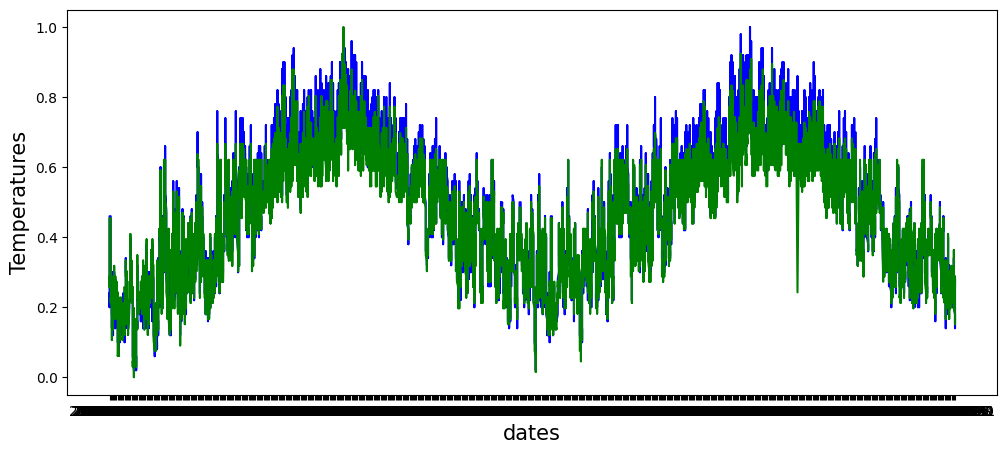

In [ ]:
#Visualisasi temperatur dan A-temperatur terhadap waktu pada 2 tahun
mat.figure(figsize=(12, 5))
mat.plot(bikehour['dteday'], bikehour['temp'], color='blue')
mat.plot(bikehour['dteday'], bikehour['atemp'], color='green')
mat.xlabel('dates',size=15)
mat.ylabel('Temperatures',size=15)

Bisa dilihat dari grafik diatas, temperatur dan A-Temperatur naik dan turun tergantung dengan tanggal pada tahun, dimana Januari tahun 2011, Desember 2011, Januari 2012, dan Desember 2012 menjadi titik rendah temperatur.

Disini, temperatur berskala dari 0 (0 C) sampai 1.0 (41 C) dan A-Temperatur 0 (0 C) sampai 1.0 (50 C)

Text(0, 0.5, 'weather Situations')

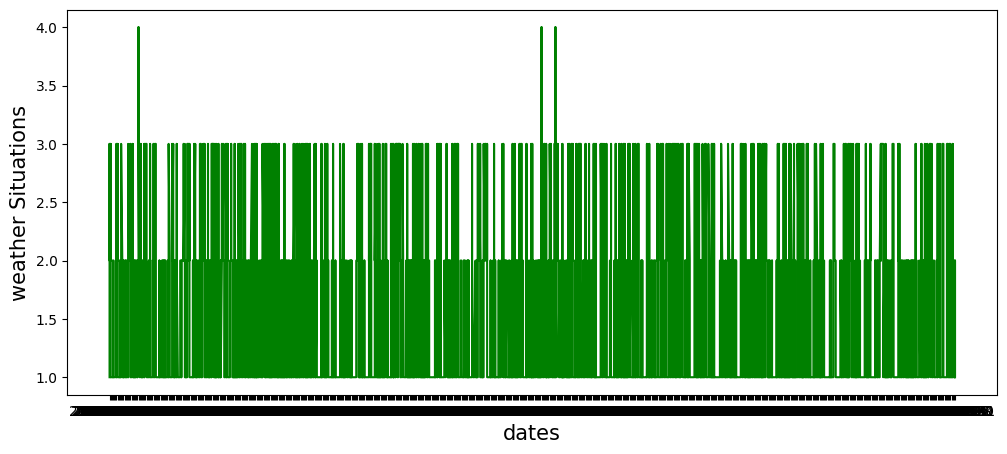

In [ ]:
#Visualisasi situasi cuaca (Weathersit) terhadap waktu pada 2 tahun
mat.figure(figsize=(12, 5))
mat.plot(bikehour['dteday'], bikehour['weathersit'], color='green')
mat.xlabel('dates',size=15)
mat.ylabel('weather Situations',size=15)

Bisa dilihat pada grafik, dominasi situasi cuaca berada pada nomor 2 yaitu berawan. Diikuti dengan situasi 3 yaitu gerimis dan/atau salju ringan. Setelah itu adalah nomor 1, yaitu cerah, dan diakhiri dengan nomor 4 yaitu hujan deras dan badai salju.

Text(0, 0.5, 'Air Quality')

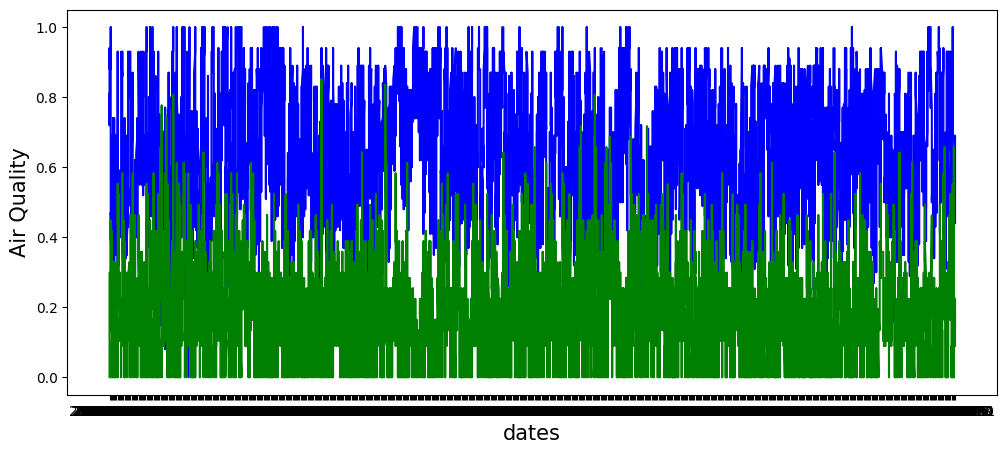

In [ ]:
#Visualisasi temperatur dan A-temperatur terhadap waktu pada 2 tahun
mat.figure(figsize=(12, 5))
mat.plot(bikehour['dteday'], bikehour['hum'], color='blue')
mat.plot(bikehour['dteday'], bikehour['windspeed'], color='green')
mat.xlabel('dates',size=15)
mat.ylabel('Air Quality',size=15)

Diatas adalah grafik kualitas air yang mencangkup humiditas dan kencang angin dimana humiditas relatif sedang sampai tinggi sepanjang 2 tahun, dan kecepatan angin relatif sedang ke rendang sepanjang 2 tahun.

Text(0, 0.5, 'Bike Counts')

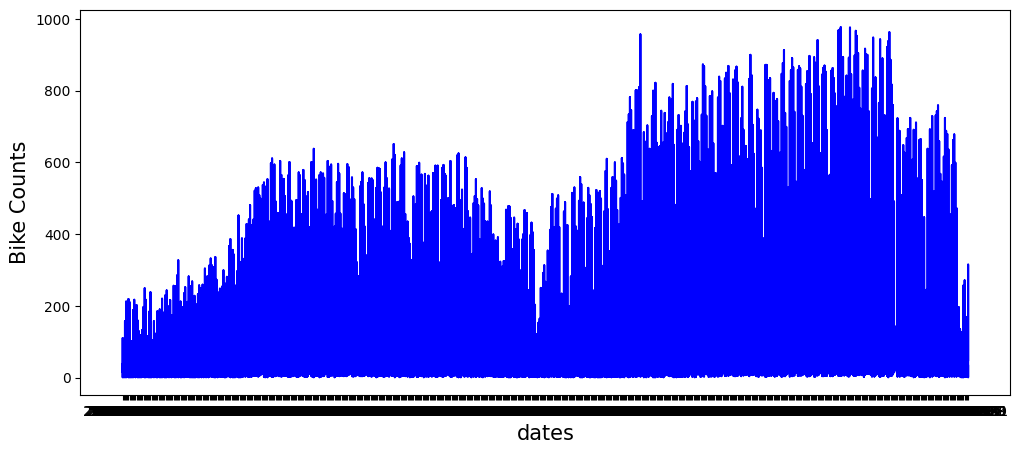

In [ ]:
#Visualisasi temperatur dan A-temperatur terhadap waktu pada 2 tahun
mat.figure(figsize=(12, 5))
mat.plot(bikehour['dteday'], bikehour['cnt'], color='blue')
mat.xlabel('dates',size=15)
mat.ylabel('Bike Counts',size=15)

Grafik diatas menunjukkan bahwa penggunaan sepeda meningkat ditengah tahun dan menurun di awal dan akhir tahun, dan juga adanya peningkatan penggunaan sepeda pada tahun 2012 dibanding tahun 2011.

### Pertanyaan 1: Apakah Temperatur (temp) dan "Feels Like" Temperatur (atemp) berpengaruh pada jumlah total penggunaan sepeda (cnt)?

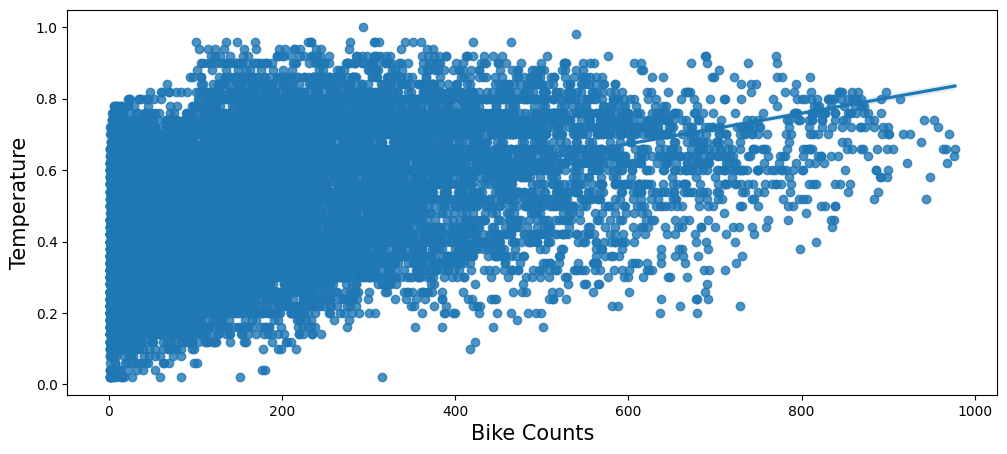

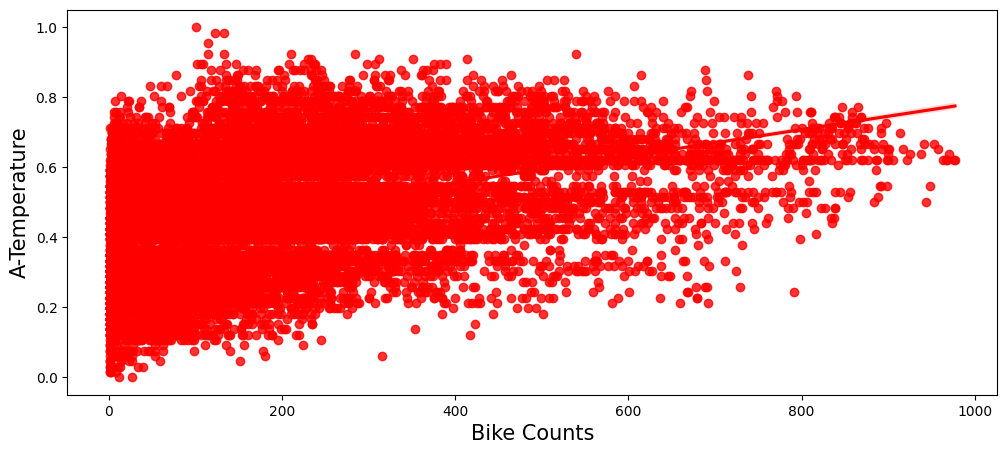

In [ ]:
#Korelasi Temp dan cnt
mat.figure(figsize=(12, 5))
sea.regplot(x=bikehour['cnt'], y=bikehour['temp'])
mat.xlabel('Bike Counts',size=15)
mat.ylabel('Temperature',size=15)
mat.show()
#Korelasi A-Temp dan cnt
mat.figure(figsize=(12, 5))
sea.regplot(x=bikehour['cnt'], y=bikehour['atemp'], color='red')
mat.xlabel('Bike Counts',size=15)
mat.ylabel('A-Temperature',size=15)
mat.show()

Diatas adalah grafik scatterplot yang menunjukkan bahwa penggunaan sepeda memuncak dimana suhu sekitar dan suhu udara relatif tinggi walaupun tidak sangat tinggi. 0.7 untuk temperatur dan 0.6 untuk A-Temperatur.

### Pertanyaan 2: Apakah waktu jam dalam sebuah hari (hr) berpengaruh pada jumlah total penggunaan sepeda (cnt)?

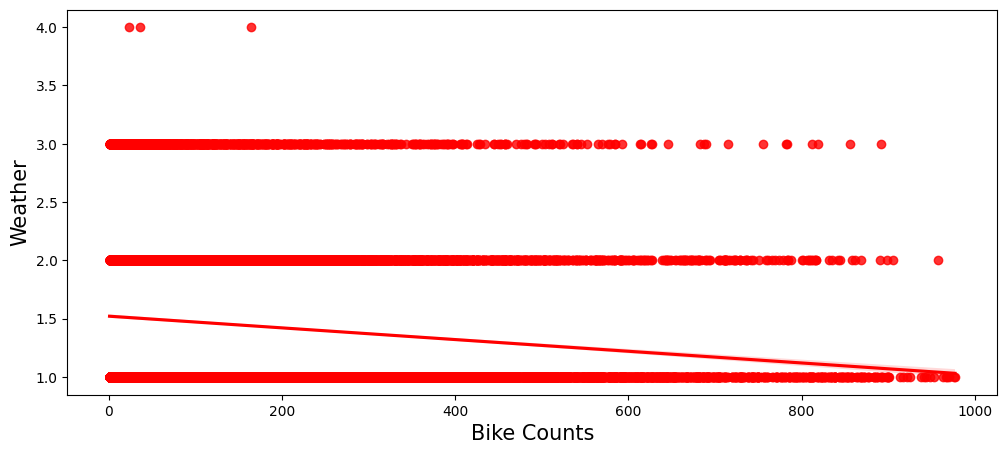

In [ ]:
#Korelasi Weathersit dan cnt
mat.figure(figsize=(12, 5))
sea.regplot(x=bikehour['cnt'], y=bikehour['weathersit'], color='red')
mat.xlabel('Bike Counts',size=15)
mat.ylabel('Weather',size=15)
mat.show()

Pada grafik korelasi diatas dapat dilihat dengan jelas bahwa penggunaan sepeda relatif setara pada cuaca terang, berawan, dan gerimis kecil dengan sedikit perbedaan. Dan juga bisa dilihat bahwa hampir tidak ada penggunaan sepeda pada cuaca hujan deras dan/atau badai salju.

### Pertanyaan 3: Apakah waktu jam dalam sebuah hari (hr) berpengaruh pada jumlah total penggunaan sepeda (cnt)?

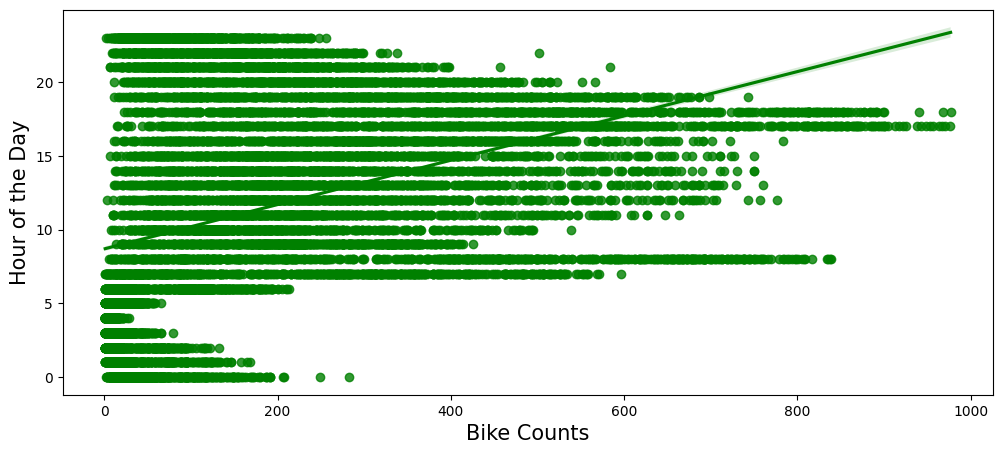

In [ ]:
#Korelasi hr dan cnt
mat.figure(figsize=(12, 5))
sea.regplot(x=bikehour['cnt'], y=bikehour['hr'], color='green')
mat.xlabel('Bike Counts',size=15)
mat.ylabel('Hour of the Day',size=15)
mat.show()

Diatas adalah korelasi jam pada sebuah hari dengan penggunaan sepeda, dimana penggunaan memuncak pada sekitar dan 9 dan sekitar jam 18 - 19.

###Pertanyaan 4: Apakah kelembapan (hum) dan kecepatan angin (windspeed) berpengaruh pada jumlah total penggunaan sepeda (cnt)?

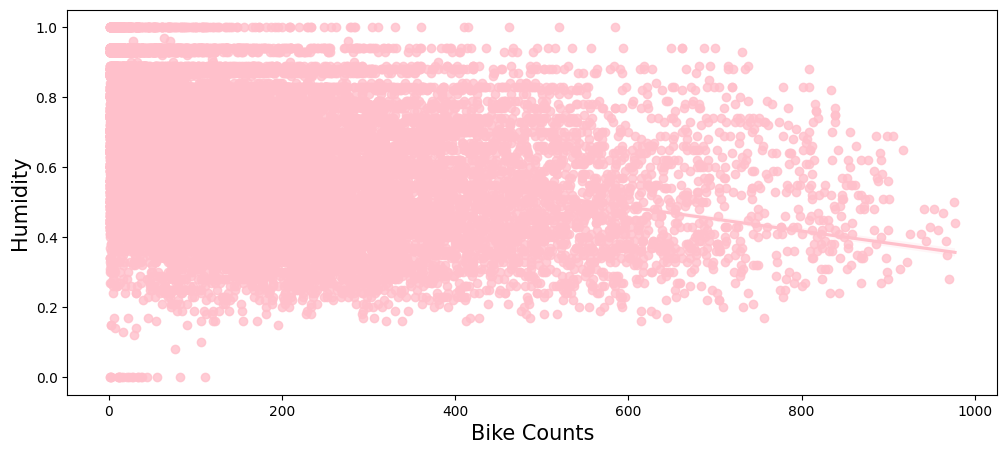

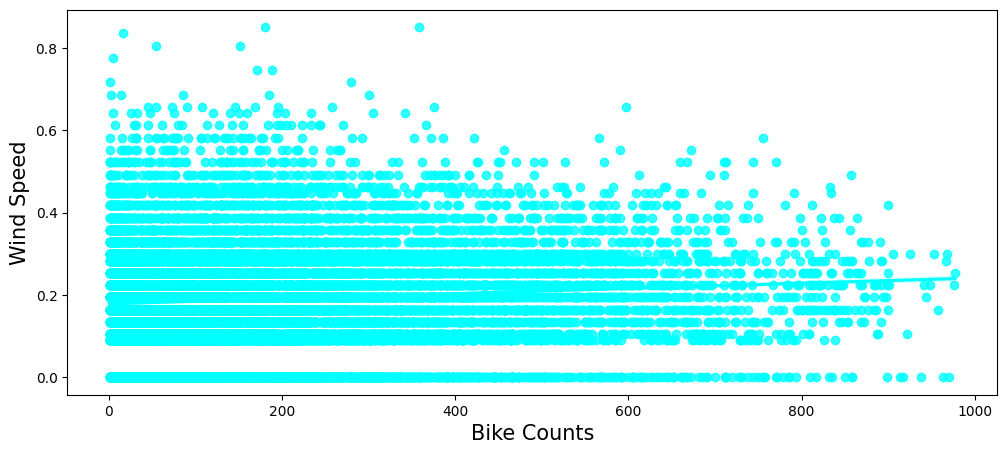

In [ ]:
#Korelasi hum dan cnt
mat.figure(figsize=(12, 5))
sea.regplot(x=bikehour['cnt'], y=bikehour['hum'], color='Pink')
mat.xlabel('Bike Counts',size=15)
mat.ylabel('Humidity',size=15)
mat.show()
#Korelasi windspeed dan cnt
mat.figure(figsize=(12, 5))
sea.regplot(x=bikehour['cnt'], y=bikehour['windspeed'], color='cyan')
mat.xlabel('Bike Counts',size=15)
mat.ylabel('Wind Speed',size=15)
mat.show()

Bisa dilihat dari grafik diatas bahwa penggunaan sepeda memuncak saat humiditas udara relatif sedang kebawah. Sama dengan humiditas, penggunaan sepeda naik saat kecepatan udara menurun.

## Conclusion

- Conclusion 1: Bisa disimpulkan bahwa orang orang akan menggunakan sepeda mereka ataupun rental pada saat temperatur yang ada pada lingkungan sekitar relatif hangat, mungkin karena suhu hangat mendorong keinginan berolahraga.

- Conclution 2: Bisa disimpulkan bahwa penduduk akan menggunakan sepeda saat suhu nyaman dan tenang, dari cuaca terang, berawan, dan juga gerimis kecil. Walaupun ada beberapa yang nekat menggunakan sepeda pada hujan deras ataupun badai salju.

- Conclusion 3: Waktu yang cocok untuk bersepeda terlihat adalah pagi sekitar jam 9, mungkin dengan banyaknya yang berangkat kerja. Penggunaan sepeda juga naik pada jamm 18 dan 19, menandakan bahwa awal malam hari mungkinlah waktu yang tepat untuk bersepeda tenang.

- Conclusion 4: Dari kedua grafik bisa disimpulkan bahwa orang orang suka bersepeda saat kualitas udara tenang, dengan humiditas rendah agar tidak terlalu berkeringat dan juga kekuatan angin yang lemah.